In [53]:
import numpy as np
import torch
import torch.nn.functional as F
import torchaudio
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from torchvision import datasets, transforms
from torchaudio.transforms import Spectrogram, Resample

from PIL import Image

from collections import OrderedDict
from typing import List, Dict, Optional

from dataclasses import dataclass, field

In [45]:
transform_1 = transforms.Compose([
    transforms.RandomRotation(50),
    transforms.ToTensor()
])
transform_2 = transforms.Compose([
    transforms.RandomResizedCrop((256, 256)),
    transforms.ToTensor()
])
transform_3 = transforms.Compose([
    transforms.RandomAffine((-90, 90)),
    transforms.ToTensor()
])
transform_4 = transforms.Compose([
    transforms.GaussianBlur(9),
    transforms.ToTensor()
])
transform_5 = transforms.Compose([
    transforms.ColorJitter(3),
    transforms.ToTensor()
])

In [46]:
dataset_0 = datasets.CIFAR10(root="./data", train = True, download = True)
dataset_1 = datasets.CIFAR10(root="./data", train = True, download = True, transform = transform_1)
dataset_2 = datasets.CIFAR10(root="./data", train = True, download = True, transform = transform_2)
dataset_3 = datasets.CIFAR10(root="./data", train = True, download = True, transform = transform_3)
dataset_4 = datasets.CIFAR10(root="./data", train = True, download = True, transform = transform_4)
dataset_5 = datasets.CIFAR10(root="./data", train = True, download = True, transform = transform_5)

In [47]:
def show_images(dataset, num_images=10, cols=5, title="Images"):
    images = []
    labels = []

    for i in range(min(num_images, len(dataset))):
        img, label = dataset[i]
        images.append(img)
        labels.append(label)

    if torch.is_tensor(images[0]):
        images = torch.stack(images)

    rows = (num_images + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))

    if rows == 1 and cols == 1:
        axes = [[axes]]
    elif rows == 1:
        axes = [axes]
    elif cols == 1:
        axes = [[ax] for ax in axes]

    for i, ax in enumerate([ax for row in axes for ax in row]):
        if i < len(images):
            img = images[i]

            if torch.is_tensor(img):
                if img.dim() == 3 and img.shape[0] in [1, 3, 4]:
                    img = img.permute(1, 2, 0).numpy()
                else:
                    img = img.numpy()

            ax.imshow(img)
            ax.set_title(f'Label: {labels[i]}')
            ax.axis('off')
        else:
            ax.axis('off')

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

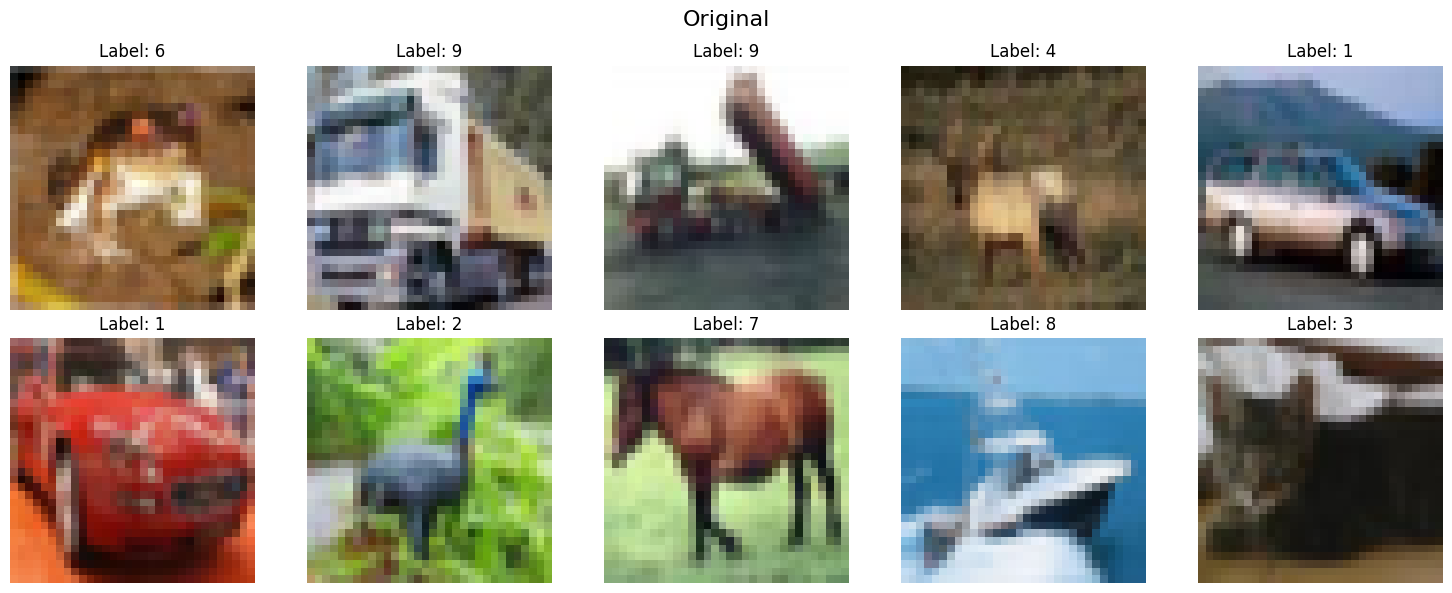

In [48]:
show_images(dataset_0, title="Original")

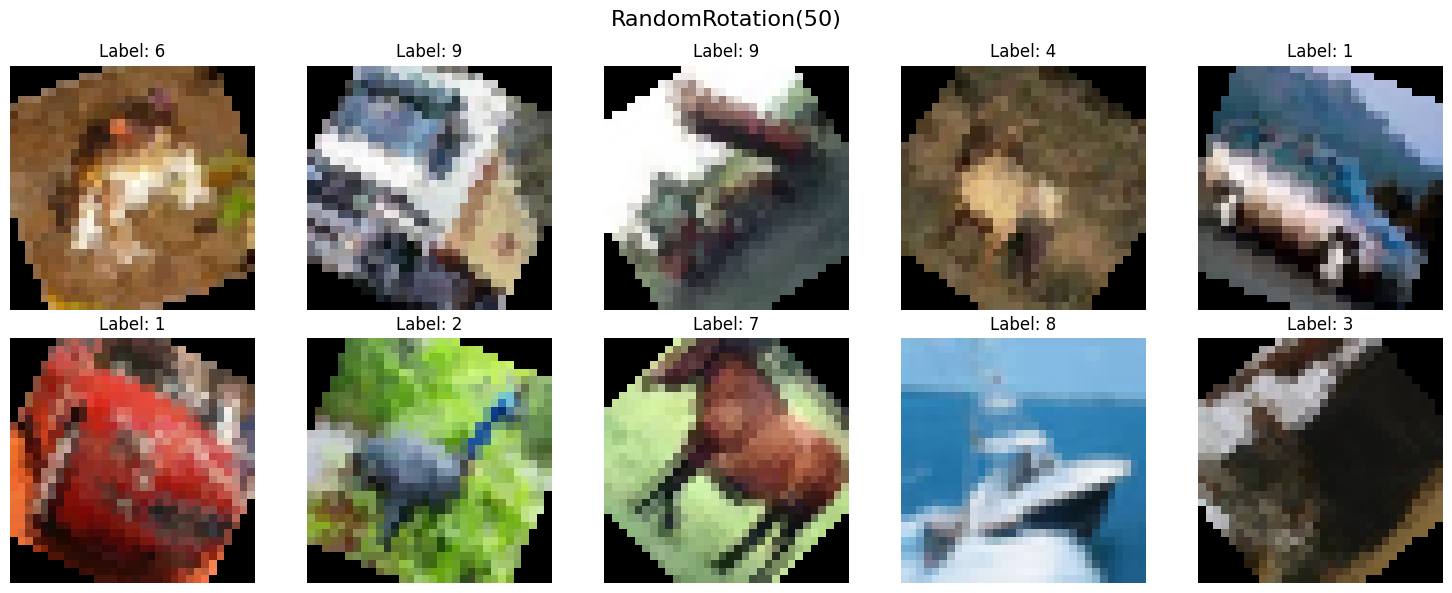

In [49]:
show_images(dataset_1, title = "RandomRotation(50)")

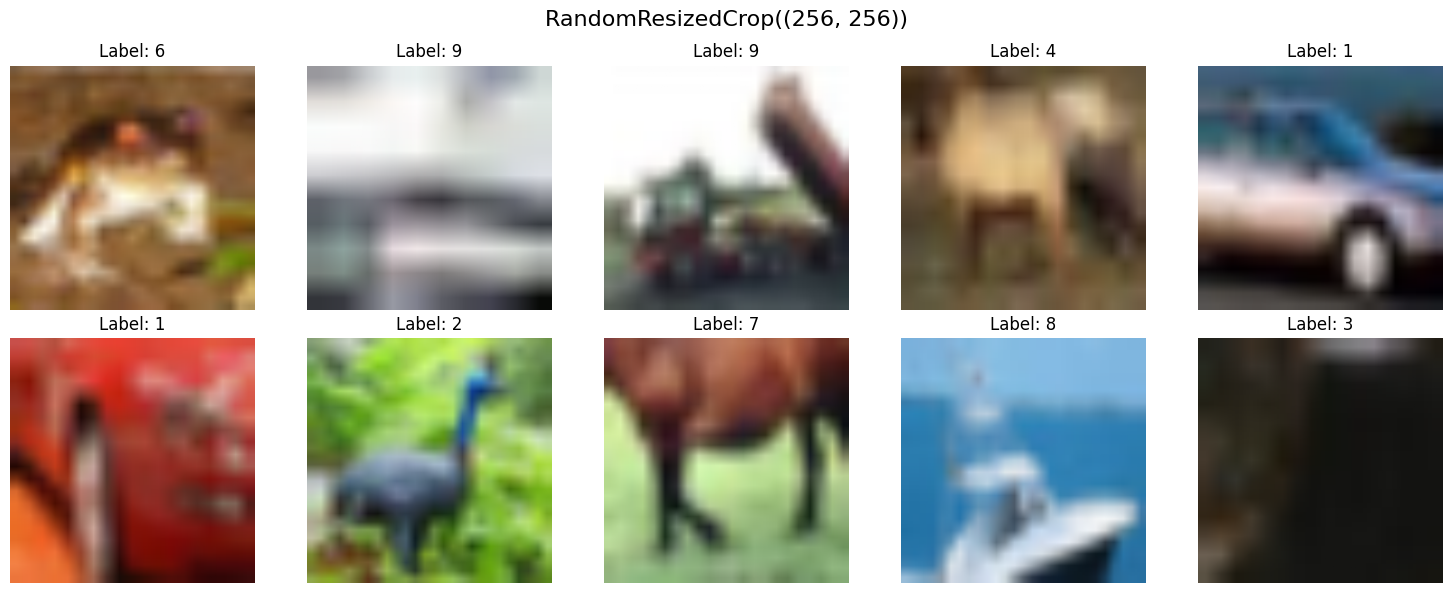

In [50]:
show_images(dataset_2, title = "RandomResizedCrop((256, 256))")

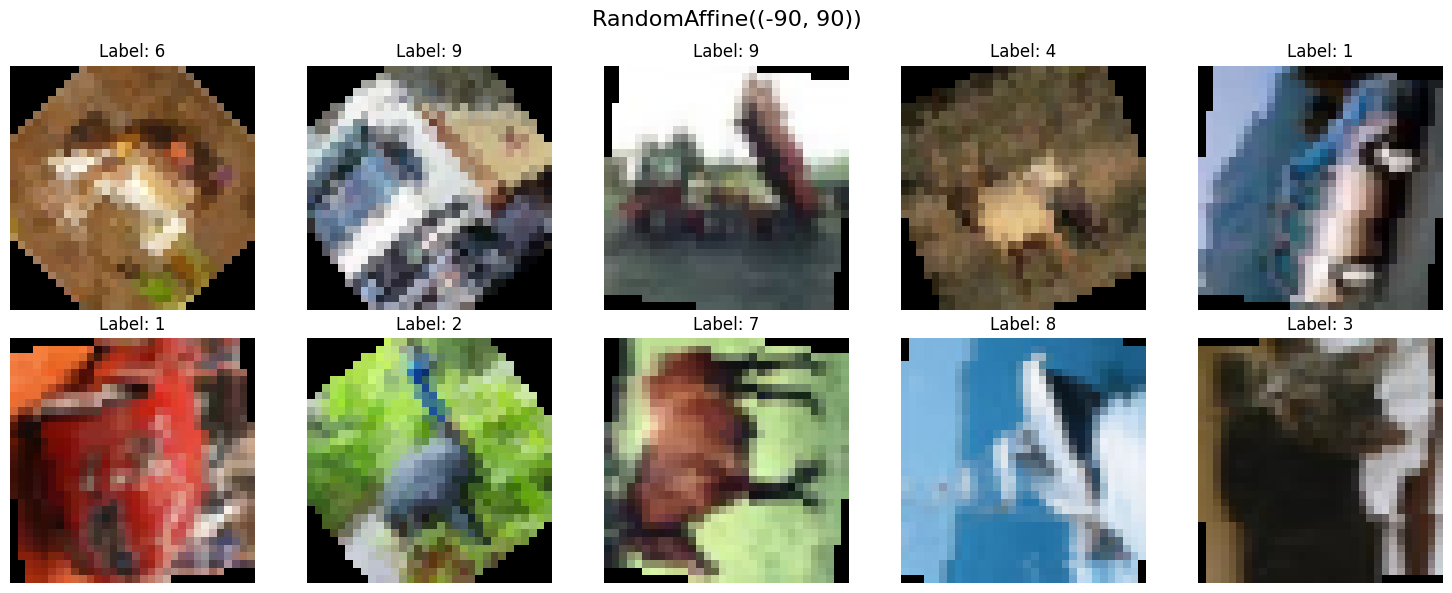

In [41]:
show_images(dataset_3, title = "RandomAffine((-90, 90))")

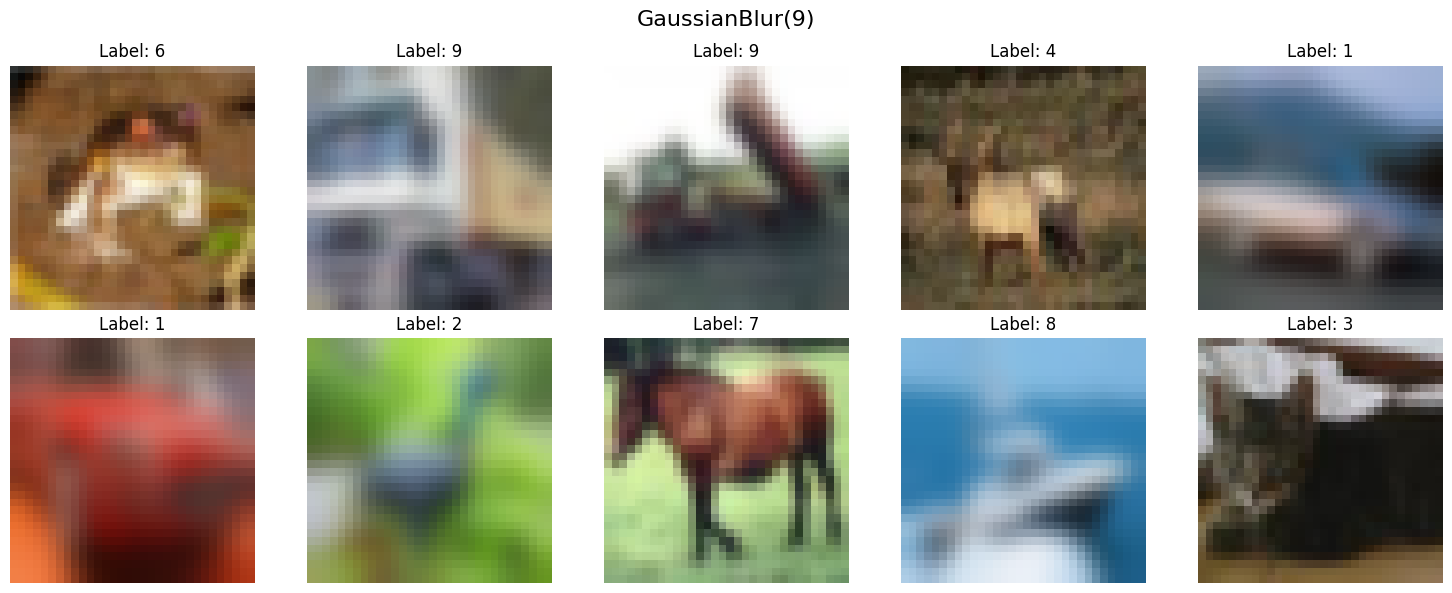

In [51]:
show_images(dataset_4, title = "GaussianBlur(9)")

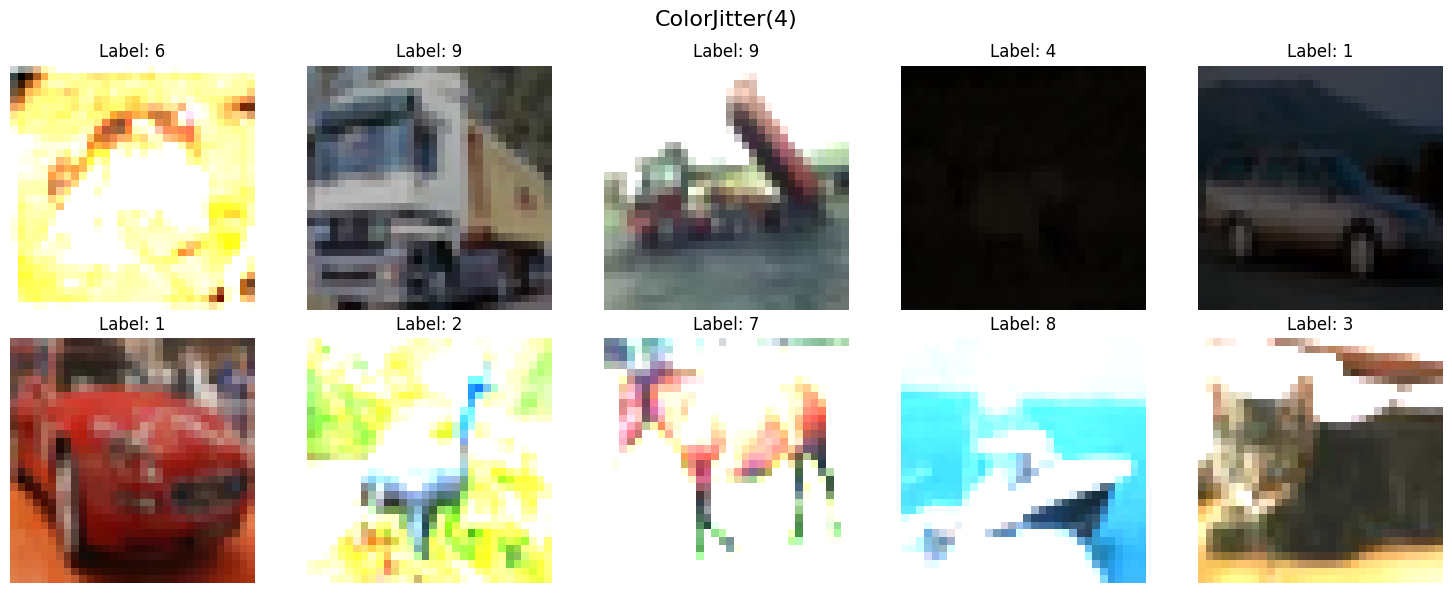

In [54]:
show_images(dataset_5, title="ColorJitter(4)")

# Вывод
Я испытал 5 различных аугментаций: RandomRotation, RandomResizedCrop, RandomAffine, GaussianBlur, ColorJitter. Они изменяют изображение детерменированным образом, описанным в документации Pytorch.